# ECON408: Assignment 3

Jesse Perla, UBC

## Student Name/Number: (doubleclick to edit)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [2]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

## Question 1

Following the notes on [AR(1)
processes](https://jlperla.github.io/ECON408/lectures/stochastic_dynamics.html#/title-slide)
rather than plotting the distribution as normal instead lets see what
the stationary distribution looks like with simulation.

### Part (a)

From $X_0 = 1.0$ simulate up to $T=1000$ using the process

$$
X_t = a X_{t-1} + b + c W_t
$$

Where $a=0.9, b=0.1, c=0.5$.

In [4]:
T = 1000
X_0 = 1.0
a = 0.9
b = 0.1
c = 0.5
# Add code here

# Initialize the process
X = zeros(T)
X[1] = 1.0  # Initial condition X_0

# Simulate the process
for t in 2:T
    W_t = randn()  # W_t ~ N(0,1)
    X[t] = a * X[t-1] + b + c * W_t
end

# Plot the process
plot(X, label="AR(1) Process", xlabel="Time", ylabel="Value", title="Simulation of AR(1) Process")

UndefVarError: UndefVarError: `plot` not defined

### Part (b)

On the same graph plot the histogram of those simulated values (i.e.,
$\{X_0, \ldots X_T\}$) then plot the density of the stationary
distribution calculated in closed from in [those
notes](https://julia.quantecon.org/introduction_dynamics/ar1_processes.html#equation-mu-sig-star)
(i.e. create a normal distribution with $\mu^* = b/(1-a)$ and
$v^* = c^2/(1 - a^2)$

Hint: `histogram(X, normed=true)` normalizes the empirical draws so they
are a proper PMF.

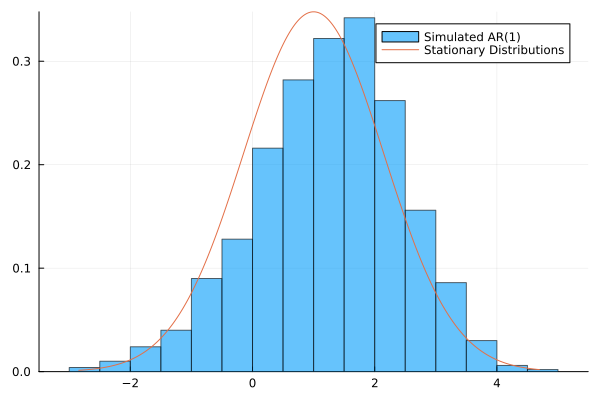

In [52]:
# Add code here
# Calculate the parameters of the stationary distribution
a = 0.9
b = 0.1
c = 0.5
mu_star = b / (1 - a)
v_star = c^2 / (1 - a^2)

# Create the normal distribution for the stationary distribution
stationary_dist = Normal(mu_star, sqrt(v_star))

# Create a range for plotting the density
x_range = minimum(X):0.01:maximum(X)

# Plot the histogram of the simulated values and overlay the density
histogram(X, normed=true, label="Simulated AR(1)", alpha=0.6)
plot!(x_range, pdf.(stationary_dist, x_range), label="Stationary Distributions")

### Part (c)

What happens if you discard the first 200 observations from that
simulation (i.e., $\{X_{199}, \ldots X_T\}$))?

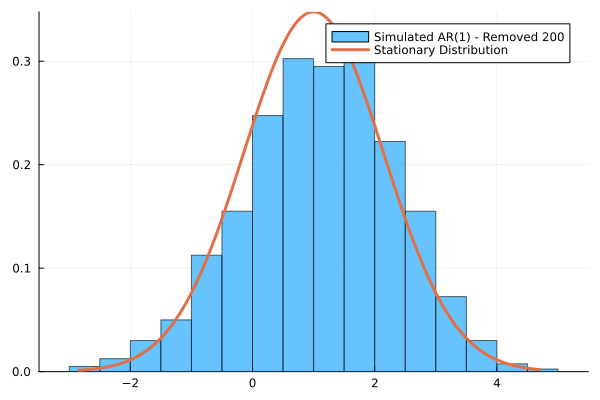

In [54]:
# Add code here

X_trimmed = X[201:end]

# Plot the histogram of the trimmed values and overlay the density
histogram(X_trimmed, normed=true, label="Simulated AR(1) - Removed 200", alpha=0.6)
plot!(x_range, pdf.(stationary_dist, x_range), label="Stationary Distribution", linewidth=3)

Do these line up approximately? Explain why it may be better or worse? 

In [2]:
x = "string"
reverse(x)

"gnirts"

(double click to edit your answer)


Removing the previous 200 obervation do make the graph line up a bit better. As it mitigates the influence of the initial conditions and allows the process to demonstrate its typical long-term behavior.

I believe that whether it would be better or worse depend on the study and research interest. If we are interested in the long term behavirour, discarding the initial 200 observation might give us a more represented simulated distribution. However if our study is short term, the effect and noise at the beginning of the process when it slowly revert to the long term mean is still crucial.

Reusable functions, do not modify without clearly annotating your
changes.

In [26]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v)
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
# Assumes that v is sorted!
gini(v) = (2 * sum(i * y for (i,y) in enumerate(v))/sum(v)
           - (length(v) + 1))/length(v)

gini (generic function with 1 method)

## Question 2

You can create a Pareto distribution with tail parameter `a` and draw
from it with

In [5]:
a = 1.5
d = Pareto(a)
rand(d, 3)

3-element Vector{Float64}:
  2.1756255655839656
  2.6336306429590004
 18.085169223164915

The gini coefficient of a Pareto distribution is given by

$$
G = \frac{1}{2a - 1}
$$

### Part (a)

Draw `N=1000` observations from the Pareto distribution for `a = 1.5`
and calculate the gini coefficient. Compare to the closed-form solution

In [1]:
N = 1000
a = 1.5
# your code here


d = Pareto(a)
# Draw observations from the Pareto distribution
observations = rand(d, N)

# Sort the observations
sorted_observations = sort(observations)

# Calculate the empirical Gini coefficient
empirical_gini = gini(sorted_observations)

# Theoretical Gini coefficient
theoretical_gini = 1 / (2 * a - 1)

(empirical_gini, theoretical_gini)

UndefVarError: UndefVarError: `Pareto` not defined

### Part (b)

Given a pdf $f(x)$ the cumulative distribution function is given by
$F(x) = \int_{-\infty}^x f(y) dy$. The complementary cumulative
distribution function (CCDF) is given by $F^c(x) = 1 - F(x)$. It starts
at $1$ at the minimum of the support of the distribution and then drops
to $0$ at the maximum of the support.

Take the following code which calculates the CCDF for a distribution and
a range of values `x`.

For this, plot the relationship between the `log(x)` and
`log(ccdf(d,x))` for the distribution below (this is called a [log-log
plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot)). Describe
what you know about this relationship?

In [2]:
ccdf(d, x) = 1 - cdf(d, x)

N = 1000
a = 1.5
d = Pareto(a)
max_x = 10.0
num_points = 100
x = range(support(d).lb, max_x, num_points)  # from the lower bound of support to max_x


# Calculate CCDF values
ccdf_values = [ccdf(d, xi) for xi in x]

# Calculate log-log values
log_x = log.(x)
log_ccdf = log.(ccdf_values)

# Create the log-log plot
plot(log_x, log_ccdf, xlabel="log(x)", ylabel="log(CCDF)", title="Log-Log Plot of Pareto Distribution CCDF", legend=false)
# edit your code here

UndefVarError: UndefVarError: `Pareto` not defined

### Part (b)

For the above case, numerically calculate the slope of this line
(easiest is just rise over run). Compare it to the tail parameter `a`.

In [3]:
# your code here

# Assuming log_x and log_ccdf are already calculated as per your code

# Select two points - ideally, these should be far apart
# For simplicity, let's take the first and last points
x1, y1 = log_x[1], log_ccdf[1]
x2, y2 = log_x[end], log_ccdf[end]

# Calculate the slope (rise over run)
slope = (y2 - y1) / (x2 - x1)

# Compare with the negative of the tail parameter
tail_parameter = -a

(slope, tail_parameter)

UndefVarError: UndefVarError: `log_x` not defined

### Part (c)

Do we will do the [empirical
counterpart](https://en.wikipedia.org/wiki/Empirical_distribution_function).
Given unweighted vector $\{X_n\}_{n=1}^N$ of observations, we can define
the empirical CDF as

$$
\hat{F}(x) = \frac{\text{number of observations } X_n \leq x}{N}
$$

With the equivalent CCDF as $1 - \hat{F}(x)$.

The code below calculates the empirical CDF for some simulated data.
Adapt it to (1) draw `N` draws from the Pareto distribution above with
`a = 1.5`; (2) plot the same log-log plot as above; and (3) overlay the
plot with the theoretical log-log plot from the previous part to compare
the two.

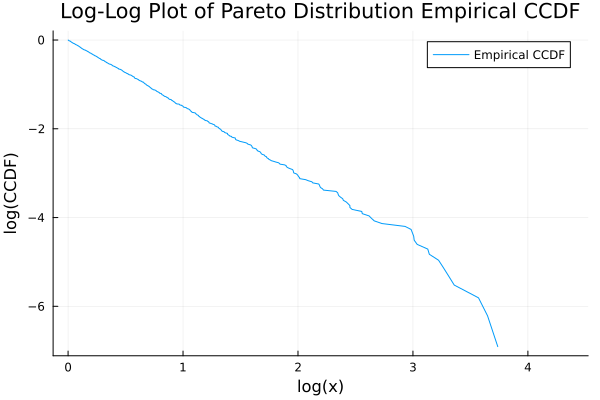

In [36]:
# your code to adapt
N = 1000
a = 1.5
x = sort(rand(Pareto(a),N))  # this draws normals, adapt to our areto
F_hat(x) = (1:length(x)) ./ length(x) # the cdf values at the x values are just the counts normalized by the total number of observations  No need to modify.
# Calculate the empirical CCDF
empirical_ccdf = 1 .- F_hat(x)
# Create the log-log plot
plot(log.(x), log.(empirical_ccdf), label="Empirical CCDF", xlabel="log(x)", ylabel="log(CCDF)", title="Log-Log Plot of Pareto Distribution Empirical CCDF", legend=:topright)

This shows methods for understanding the tail behavior of distributions.
If it approaches a straight line, then it is called a power-law tail.

### Part (d)

Now lets do the same empirical check on the tail behavior with a
LogNormal distribution - which does not have a power-law tail and the
[Frechet](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)
distribution - which does.

First, adapt your code above to (1) draw `N=1000` elements from the
`LogNormal(0.0, 0.5)` (2) plot the pdf to get a feel for the
distribution on a reasonable range, then finally (3) plot the
theoretical and empirical log-log plots as you did before.

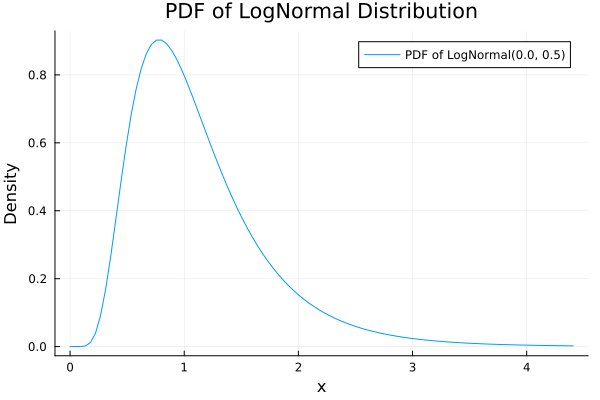

In [43]:
# your code to adapt
N = 1000
d = LogNormal(0.0, 0.5)
observations = sort(rand(d,N))

# Plot the PDF of the LogNormal distribution
x_pdf = range(0, stop=maximum(observations), length=100)
y_pdf = pdf.(d, x_pdf)
plot(x_pdf, y_pdf, label="PDF of LogNormal(0.0, 0.5)", xlabel="x", ylabel="Density", title="PDF of LogNormal Distribution")

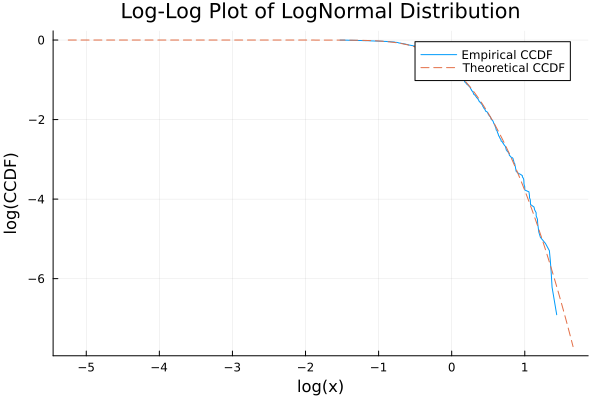

In [42]:
# your code to adapt
# add code for the log-log plot
# Plot the PDF of the LogNormal distribution
# Empirical CDF function
F_hat(x) = (1:length(x)) ./ length(x)

# Calculate the empirical CCDF
empirical_ccdf = 1 .- F_hat(observations)

# Create the log-log plot for empirical CCDF
plot(log.(observations), log.(empirical_ccdf), label="Empirical CCDF", xlabel="log(x)", ylabel="log(CCDF)", title="Log-Log Plot of LogNormal Distribution", legend=:topright)

# Theoretical CCDF plot
x_theoretical = range(0, stop=maximum(observations), length=N)
ccdf_theoretical = [1 - cdf(d, xi) for xi in x_theoretical]
plot!(log.(x_theoretical), log.(ccdf_theoretical), label="Theoretical CCDF", linestyle=:dash)


Next do the same thing except with a `Frechet(1.5, 1)` (which has a tail
parameter of 1.5).

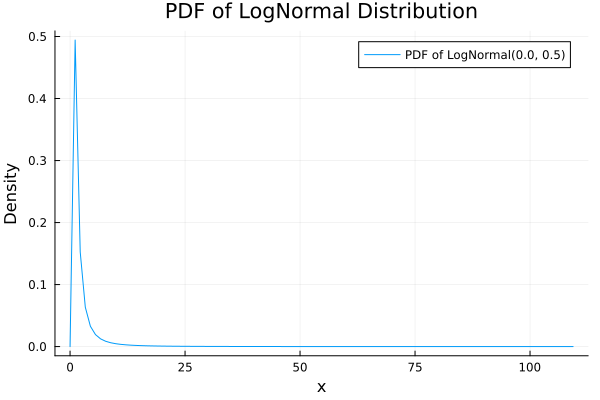

In [45]:
# your code to adapt
N = 1000
d = Frechet(1.5, 1.0)
observations = sort(rand(d,N))

x_pdf = range(0, stop=maximum(observations), length=100)
y_pdf = pdf.(d, x_pdf)
plot(x_pdf, y_pdf, label="PDF of LogNormal(0.0, 0.5)", xlabel="x", ylabel="Density", title="PDF of Frechet")

# add code here to plot the pdf

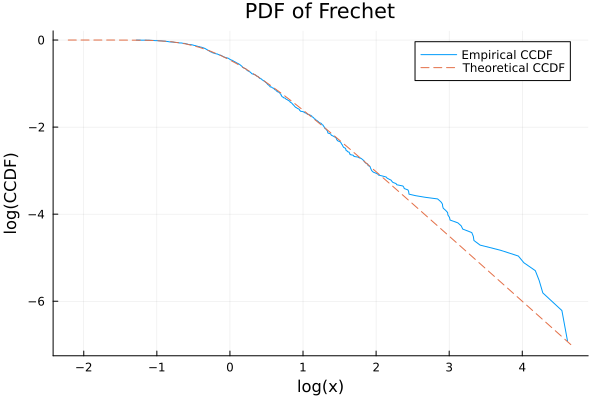

In [55]:
# your code to adapt
# add code for the log-log plot

F_hat(x) = (1:length(x)) ./ length(x)
# Calculate the empirical CCDF
empirical_ccdf = 1 .- F_hat(observations)

# Create the log-log plot for empirical CCDF
plot(log.(observations), log.(empirical_ccdf), label="Empirical CCDF", xlabel="log(x)", ylabel="log(CCDF)", title="PDF of Frechet", legend=:topright)

# Theoretical CCDF plot
x_theoretical = range(0, stop=maximum(observations), length=N)
ccdf_theoretical = [1 - cdf(d, xi) for xi in x_theoretical]
plot!(log.(x_theoretical), log.(ccdf_theoretical), label="Theoretical CCDF", linestyle=:dash)


### Part (e)

Comparing your answers in Part (d) and (c) what do you notice is
different theoretically between the log-log plots of distributions with
and without power-law tails? Play around with it and see if you feel you
could just look at an empirical plot and tell if it is a power-law tail
or not?

(double click to edit your answer)


Distributions with power-law tails, like the Pareto distribution, exhibit a straight-line relationship in a log-log plot because a power-law relationship translates to linearity in logarithmic scales.

Distributions without power-law tails, such as the LogNormal distribution, do not display a straight line in their log-log plots. Instead, these plots show a curvature, especially in the tail.
This curvature indicates that the distribution decays faster or slower than a power-law as it moves into the tail.


Based on this, I can visually identify a power-law tail in an empirical plot if it aligns with a straight line over a significant range in a log-log plot.